7.1. Simulate a single predictor and a nonlinear relationship, such as a sin wave shown in Fig. 7.7, and investigate the relationship between the cost, $\epsilon$, and kernel parameters for a support vector machine model:

(a) Fit different models using a radial basis function and different values of
the cost (the C parameter) and . Plot the fitted curve. For example:
```r
> library(kernlab)
> rbfSVM <- ksvm(x = x, y = y, data = sinData,
+ kernel ="rbfdot", kpar = "automatic",
+ C = 1, epsilon = 0.1)
> modelPrediction <- predict(rbfSVM, newdata = dataGrid)
> ## This is a matrix with one column. We can plot the
> ## model predictions by adding points to the previous plot
> points(x = dataGrid$x, y = modelPrediction[,1],
+ type = "l", col = "blue")
> ## Try other parameters

```
(b) The σ parameter can be adjusted using the kpar argument, such as
kpar = list(sigma = 1). Try different values of σ to understand how this
parameter changes the model fit. How do the cost, , and σ values affect
the model?

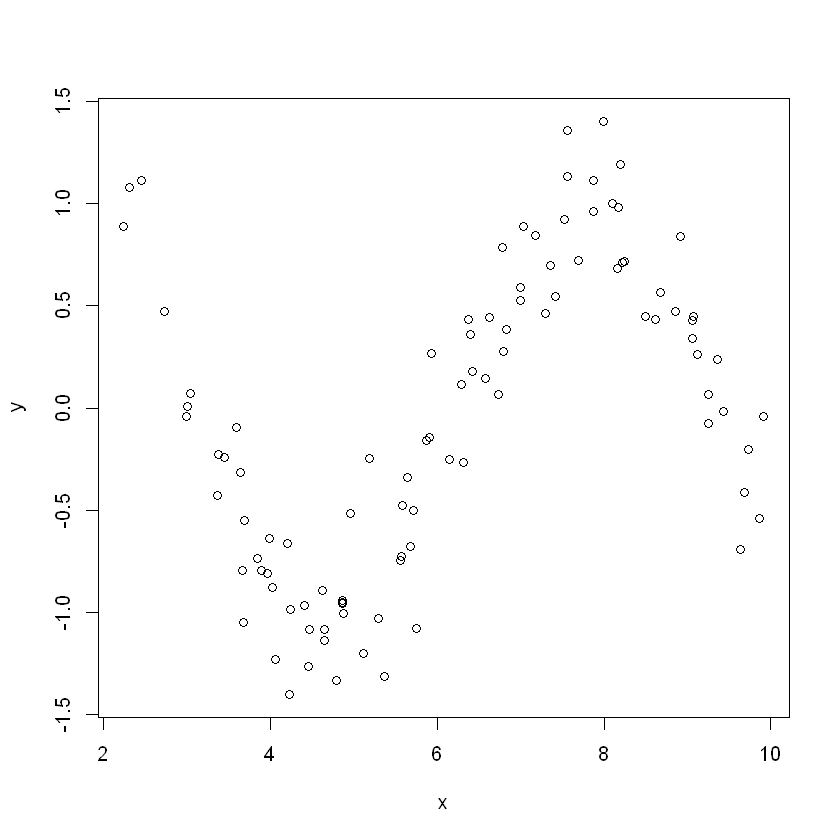

In [1]:
set.seed(100)
x <- runif(100,min=2,max=10)
y <- sin(x) + rnorm(length(x)) *0.25
df_sin <- data.frame(x=x,y=y)
plot(x,y)
df_grid <- data.frame(x=seq(2,10,length=100))

In [2]:
library(kernlab)
library(caret)
fit_rbf <- ksvm(x=x,y=y,data=df_sin,kernel="rbfdot",kpar="automatic",C=1,epsilon=0.1)
pred_rbf <- predict(fit_rbf,newdata = df_grid)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:kernlab':

    alpha



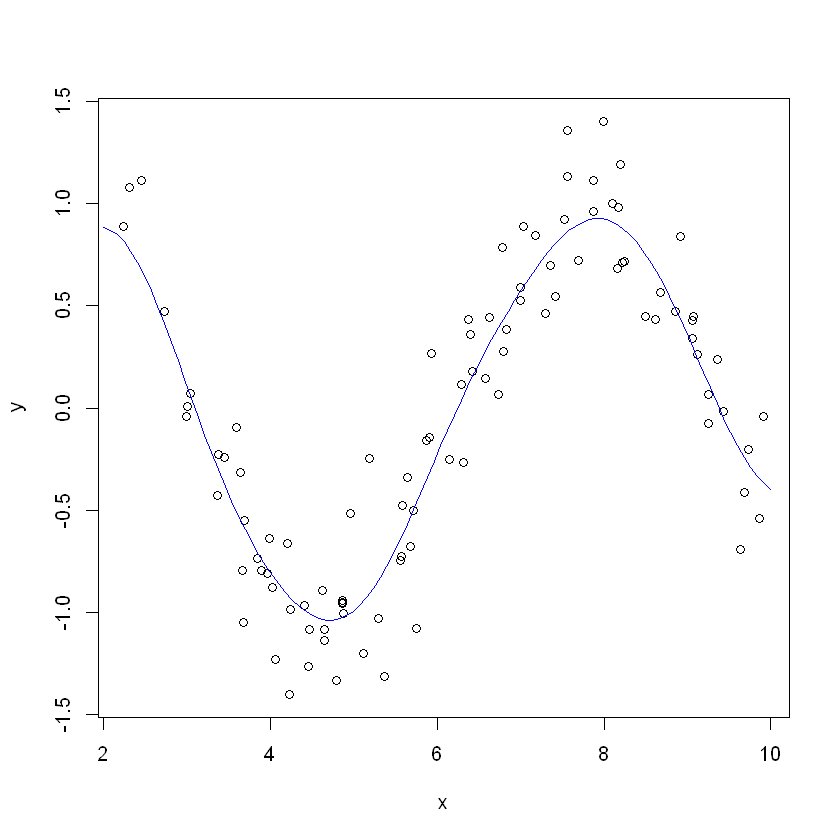

In [3]:
plot(x,y)
points(x=df_grid$x,y=pred_rbf[,1],type="l",col="blue")

In [4]:
parm_1 <- expand.grid(eps=c(.01,.05,.1,.5),
                     costs=2^c(-2,0,2,8))

In [25]:
for (i in 1:nrow(parm_1)){
    set.seed(131)
    fit_rbf <- ksvm(x=x,y=y,data=df_sin,
                   kernel="rbfdot",kpar="automatic",
                   C=parm_1$costs[i],epsilon=parm_1$eps[i])
    tmp <- data.frame(x=df_grid$x,y=predict(fit_rbf,newdata = df_grid),
                    obs=sin(df_grid$x) + rnorm(length(df_grid$x)) *0.25,
                     eps=paste("epsilon:",format(parm_1$eps)[i]),
                     costs=paste("cost",format(parm_1$costs)[i]))
    pred_1 <- if(i==1) tmp else rbind(tmp,pred_1)
}

pred_1$costs <- factor(pred_1$costs,level=rev(levels(pred_1$costs)))

In [26]:
head(pred_1)

x,y,obs,eps,costs
2.000000,1.0062866,1.2763267,epsilon: 0.50,cost 256.00
2.080808,1.0528354,0.3862250,epsilon: 0.50,cost 256.00
2.161616,1.0601565,0.6948763,epsilon: 0.50,cost 256.00
2.242424,1.0231913,1.1583073,epsilon: 0.50,cost 256.00
2.323232,0.9417788,0.6700566,epsilon: 0.50,cost 256.00
2.404040,0.8215830,0.9750236,epsilon: 0.50,cost 256.00


In [ ]:
p2 <- ggplot(data=trn,aes(x=trn$FE,y=fit_linear$finalModel$fitted.values)) + geom_point()  + geom_abline(linetype="dashed",colour = "blue") + 
    scale_y_continuous(limits = c(0,70)) + theme_few() 

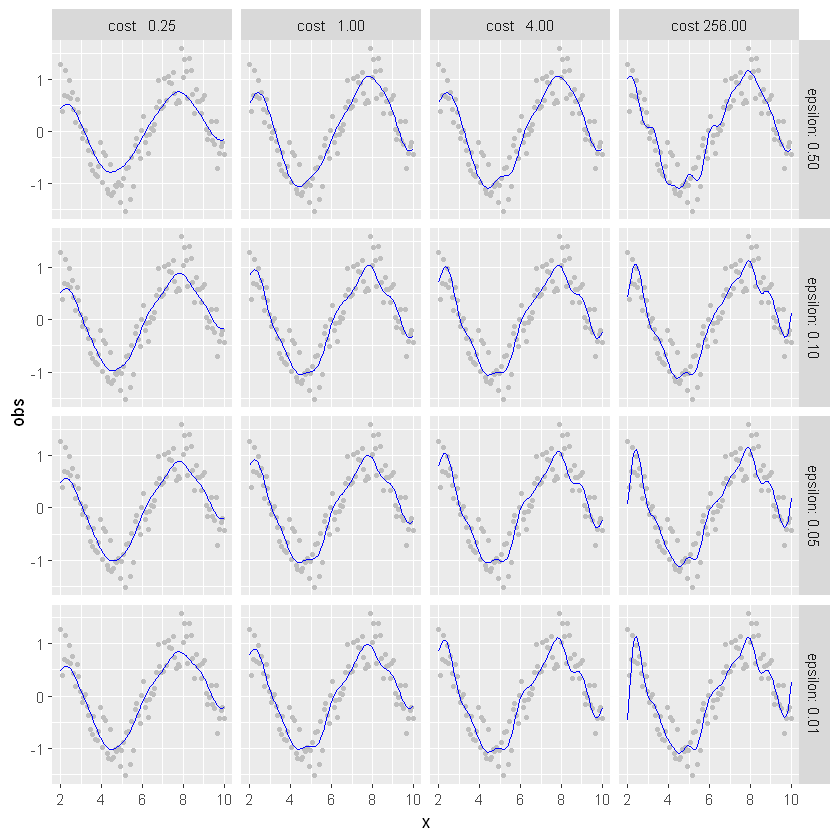

In [49]:
library(ggplot2)
library(ggthemes)

ggplot(pred_1,aes(x,obs)) + 
    geom_point(size=1,colour="grey") + 
    geom_line(aes(x,y),colour="blue") + 
    facet_grid(eps ~ costs) 

In [50]:
#the effect of sigma
set.seed(1016)
parm_2 <- expand.grid(eps=c(0.01,0.05,0.1,0.5),
                     costs=2^c(-2,0,2,8),
                     sigma=as.vector(sigest(y~x,data=df_sin,frac=0.75)))

for (i in 1:nrow(parm_2)){
    fit_rbf <- ksvm(x=x,y=y,data=df_sin,kernel="rbfdot",
                   kpar=list(sigma=parm_2$sigma[i]),
                   C=parm_2$costs[i],
                   epsilon=parm_2$eps[i])
    tmp <- data.frame(x=df_grid$x,
                     y=predict(fit_rbf,newdata = df_grid),
                     eps=paste("epsilon:",format(parm_2$eps)[i]),
                     costs=paste("cost:",parm_2$costs[i]),
                     sigma=paste("sigma:",format(parm_2$sigma,digits=2)[i]))
    pred_2 <- if(i==1) tmp else rbind(tmp,pred_2)
}

pred_2$costs <- factor(pred_2$costs,level=rev(levels(pred_2$costs)))
pred_2$sigma <- factor(pred_2$sigma,level=rev(levels(pred_2$sigma)))

In [51]:
head(pred_2)

x,y,eps,costs,sigma
2.000000,0.2232773,epsilon: 0.50,cost: 256,sigma: 37.15
2.080808,0.3506306,epsilon: 0.50,cost: 256,sigma: 37.15
2.161616,0.4953209,epsilon: 0.50,cost: 256,sigma: 37.15
2.242424,0.6312691,epsilon: 0.50,cost: 256,sigma: 37.15
2.323232,0.7266791,epsilon: 0.50,cost: 256,sigma: 37.15
2.404040,0.7557565,epsilon: 0.50,cost: 256,sigma: 37.15


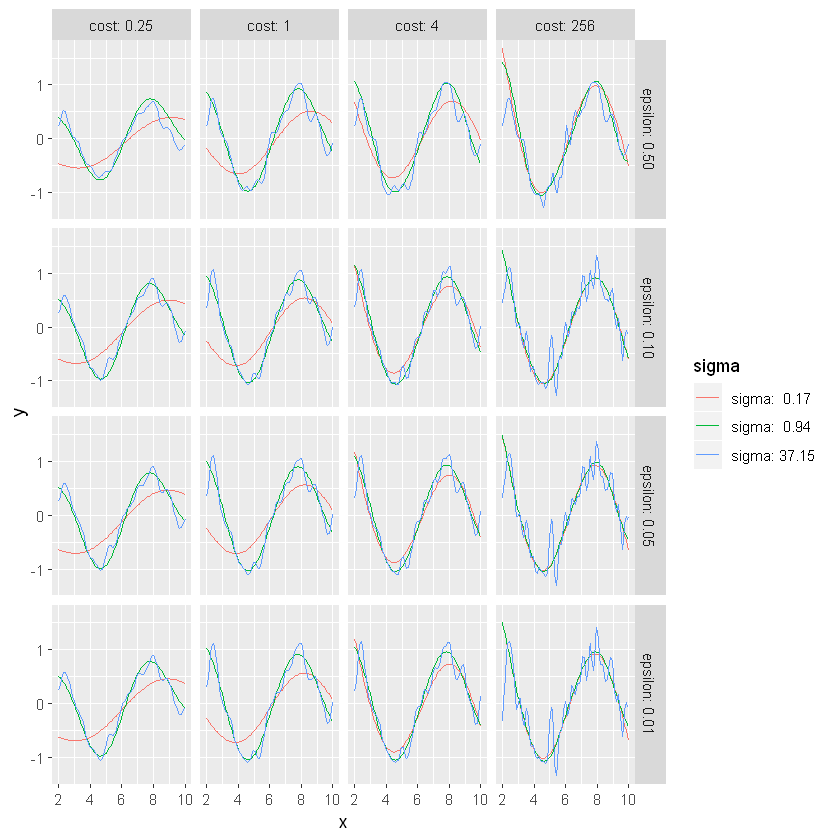

In [52]:
ggplot(pred_2,aes(x,y,colour=sigma)) + 
    geom_line() + 
    facet_grid(eps ~ costs) 

7.2. 

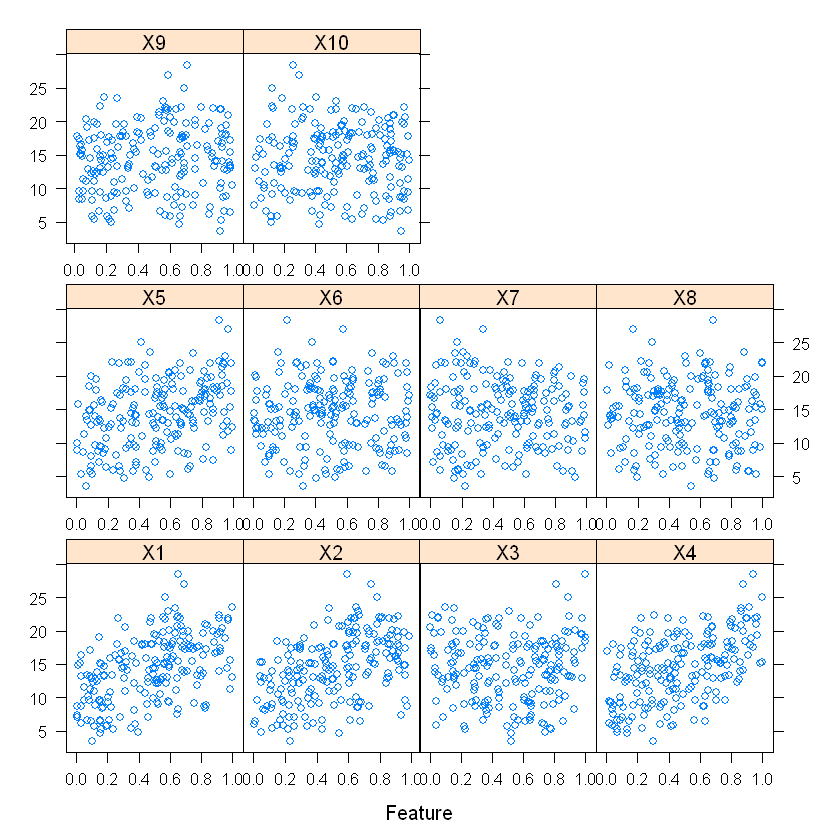

In [54]:
library(mlbench)
set.seed(200)
trn <- mlbench.friedman1(200,sd=1)
trn$x <- data.frame(trn$x)
library(AppliedPredictiveModeling)
featurePlot(trn$x,trn$y)

In [55]:
vld <- mlbench.friedman1(5000,sd=1)
vld$x <- data.frame(vld$x)

In [56]:
library(caret)
fit_knn <- train(x=trn$x,y=trn$y,method = "knn",
                preProc=c("center","scale"),
                tuneLength=10)
fit_knn

k-Nearest Neighbors 

200 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 200, 200, 200, 200, 200, 200, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  3.565620  0.4887976  2.886629
   7  3.422420  0.5300524  2.752964
   9  3.368072  0.5536927  2.715310
  11  3.323010  0.5779056  2.669375
  13  3.275835  0.6030846  2.628663
  15  3.261864  0.6163510  2.621192
  17  3.261973  0.6267032  2.616956
  19  3.286299  0.6281075  2.640585
  21  3.280950  0.6390386  2.643807
  23  3.292397  0.6440392  2.656080

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 15.

In [57]:
fit_knn$results

k,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
5,3.565620,0.4887976,2.886629,0.2589081,0.06486891,0.2430732
7,3.422420,0.5300524,2.752964,0.2474802,0.06629753,0.2212725
9,3.368072,0.5536927,2.715310,0.2381725,0.05680786,0.2011639
11,3.323010,0.5779056,2.669375,0.2274817,0.05763860,0.1849595
13,3.275835,0.6030846,2.628663,0.2205424,0.06020472,0.1899381
15,3.261864,0.6163510,2.621192,0.2400900,0.06185753,0.1998645
17,3.261973,0.6267032,2.616956,0.2523794,0.06762468,0.2070300
19,3.286299,0.6281075,2.640585,0.2591439,0.07080109,0.2183989
21,3.280950,0.6390386,2.643807,0.2715253,0.06497877,0.2116035
23,3.292397,0.6440392,2.656080,0.2645876,0.06466025,0.1997039


In [61]:
pred_knn <- predict(fit_knn,newdata = vld$x)
## The function 'postResample' can be used to get the test set
## perforamnce values
postResample(pred = pred_knn, obs = vld$y)

## The function 'postResample' can be used to get the test set
## perforamnce value

RMSE  Rsquared       MAE 
3.1750657 0.6785946 2.5443169